# What is the impact of education on homeownership in Tennessee?

B19013_001E: Median household income in the past 12 months (in 2021 inflation-adjusted dollars)
B01001B_001E: Population of males aged 18 and over
B01001_001E: Total population
B01001D_001E: Population of females aged 18 and over
B05010_001E: Number of people aged 5 and older who speak a language other than English at home
B25001_001E: Total number of housing units
B25002_003E: Number of owner-occupied housing units
B15003_001E: Educational attainment for the population 25 years and over
B15003_021E: Number of people with a Bachelor's degree
B15003_022E: Number of people with a Master's degree
B15003_023E: Number of people with a Professional school degree
B15003_024E: Number of people with a Doctorate degree
B15003_025E: Number of people with a Graduate or professional degree (not included in the previous categories)

In [45]:
import pandas as pd
import requests

url = 'https://api.census.gov/data/2021/acs/acs5?get=B19013_001E,B01001B_001E,B01001_001E,B01001D_001E,B05010_001E,B25001_001E,B25002_003E,B15003_001E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E&for=tract:*&in=state:47%20county:*'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    # Create a dictionary to map old variable names to new names
    var_names = {
        'B19013_001E': 'median_household_income',
        'B01001B_001E': 'male_population_18_and_over',
        'B01001_001E': 'total_population',
        'B01001D_001E': 'female_population_18_and_over',
        'B05010_001E': 'language_other_than_english_spoken_at_home',
        'B25001_001E': 'total_housing_units',
        'B25002_003E': 'owner_occupied_housing_units',
        'B15003_001E': 'education_population_25_and_over',
        'B15003_021E': 'bachelors_degree',
        'B15003_022E': 'masters_degree',
        'B15003_023E': 'professional_school_degree',
        'B15003_024E': 'doctorate_degree',
        'B15003_025E': 'graduate_or_professional_degree'
    }

    # Rename the variables in each row of the data list
    for i in range(len(data)):
        row = data[i]
        for j in range(len(row)):
            old_name = row[j]
            new_name = var_names.get(old_name, old_name)
            row[j] = new_name

    # Convert the data to a DataFrame
    df = pd.DataFrame(data[1:], columns=data[0])

    # Print the DataFrame
    print(df)
    print(f"Number of observations: {len(df)}")

    # Do something with the data (now in a DataFrame)
else:
    print('Request failed with status code:', response.status_code)


     median_household_income male_population_18_and_over total_population  \
0                      38728                         547             3439   
1                     104375                         122             4468   
2                      60123                         135             4347   
3                      62391                          57             4120   
4                      51837                          65             4324   
...                      ...                         ...              ...   
1696                  108798                         554             5571   
1697                   94015                         165             5393   
1698                   83021                         802             5378   
1699                   97757                         421             7876   
1700                   68062                         301             5870   

     female_population_18_and_over language_other_than_english_spoken_at_ho

In [41]:
import pandas as pd

# assuming you have already retrieved the data and stored it in a list called `data`
# and that you have created a dictionary called `var_names` to map old variable names to new names

# convert the data to a pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# convert columns to numeric data types
numeric_cols = list(var_names.values())
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

# create new column for percentage of owner-occupied housing units
df['prcnt_home_ownership'] = df['owner_occupied_housing_units'] / df['total_housing_units']
df['pct_abovehighschool'] = (df[['bachelors_degree', 'masters_degree', 'professional_school_degree', 'doctorate_degree', 'graduate_or_professional_degree']].sum(axis=1) / df['total_population']) * 100

# print the DataFrame to verify that the new column was added
import pandas as pd



print(df.head())


   median_household_income  male_population_18_and_over  total_population  \
0                    38728                          547              3439   
1                   104375                          122              4468   
2                    60123                          135              4347   
3                    62391                           57              4120   
4                    51837                           65              4324   

   female_population_18_and_over  language_other_than_english_spoken_at_home  \
0                            119                                         819   
1                            481                                         879   
2                            183                                         813   
3                              0                                        1279   
4                             78                                        1124   

   total_housing_units  owner_occupied_housing_units  \


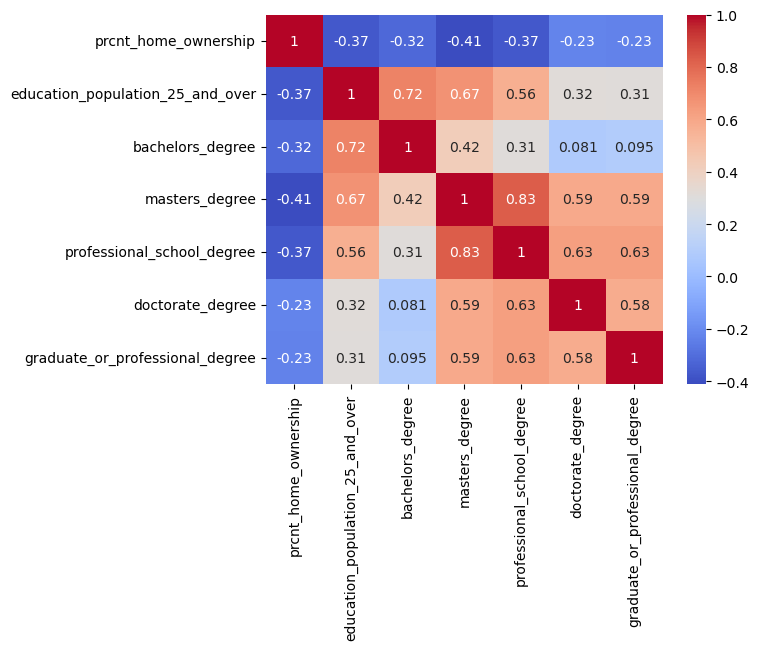

In [42]:
import seaborn as sns

# create a correlation matrix for the variables of interest
corr_matrix = df[['prcnt_home_ownership', 'education_population_25_and_over', 'bachelors_degree', 
                  'masters_degree', 'professional_school_degree', 'doctorate_degree', 
                  'graduate_or_professional_degree']].corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


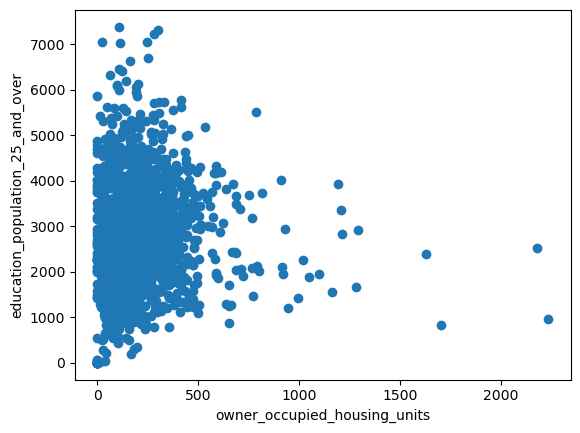

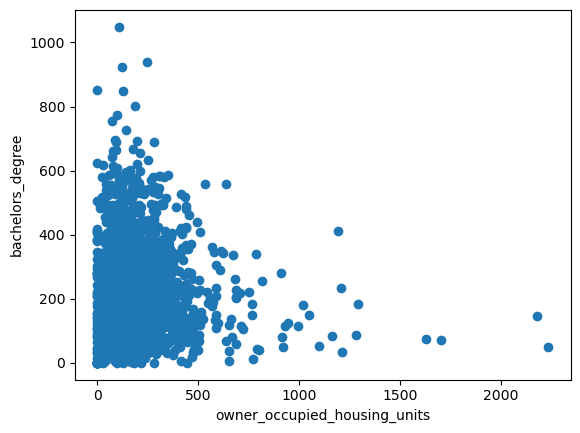

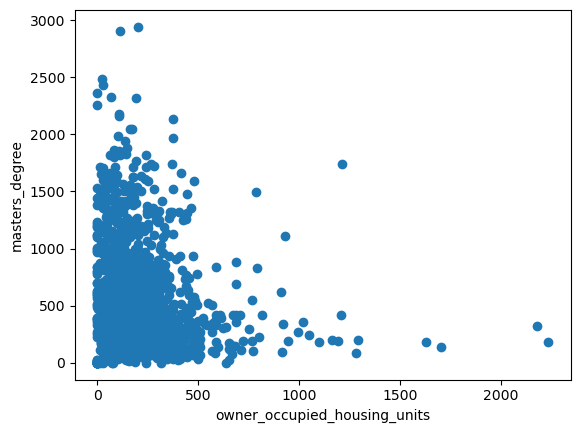

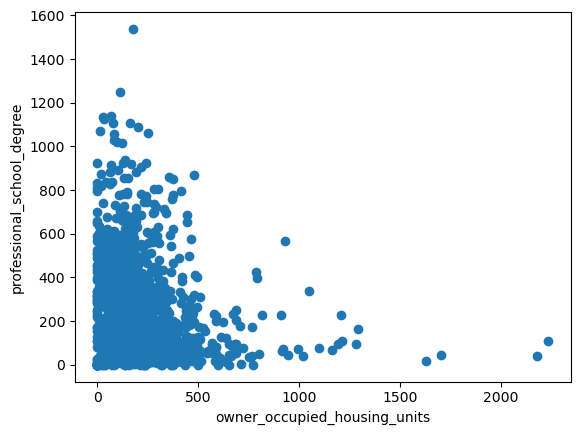

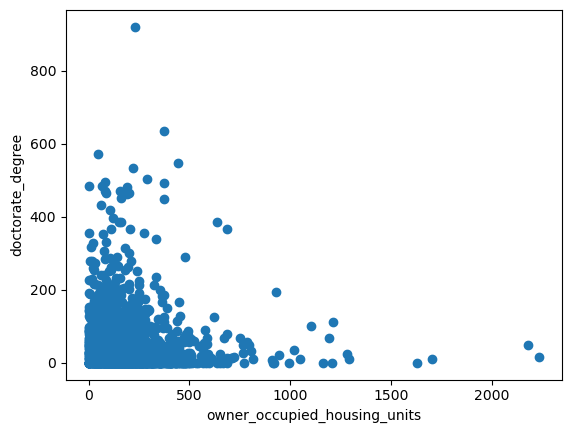

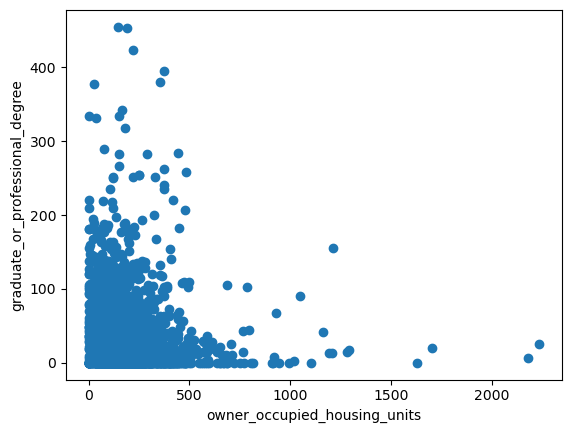

In [30]:
import matplotlib.pyplot as plt

# create a scatter plot for each variable of interest
variables = ['education_population_25_and_over', 'bachelors_degree', 'masters_degree', 
             'professional_school_degree', 'doctorate_degree', 'graduate_or_professional_degree']

for var in variables:
    plt.scatter(df['owner_occupied_housing_units'], df[var])
    plt.xlabel('owner_occupied_housing_units')
    plt.ylabel(var)
    plt.show()


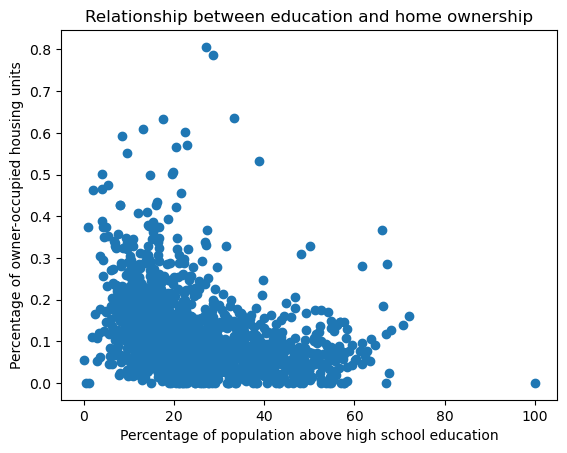

In [33]:
import matplotlib.pyplot as plt

plt.scatter(df['pct_abovehighschool'], df['prcnt_home_ownership'])
plt.xlabel('Percentage of population above high school education')
plt.ylabel('Percentage of owner-occupied housing units')
plt.title('Relationship between education and home ownership')
plt.show()


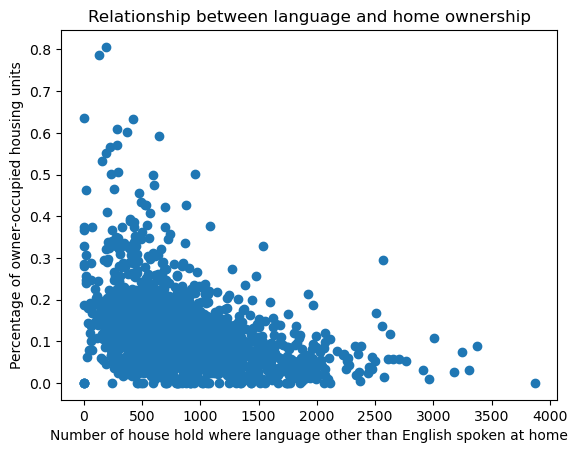

In [43]:
import matplotlib.pyplot as plt

plt.scatter(df['language_other_than_english_spoken_at_home'], df['prcnt_home_ownership'])
plt.xlabel('Number of house hold where language other than English spoken at home')
plt.ylabel('Percentage of owner-occupied housing units')
plt.title('Relationship between language and home ownership')
plt.show()


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the data into a DataFrame
url = 'https://api.census.gov/data/2021/acs/acs5?get=B19013_001E,B01001B_001E,B01001_001E,B01001D_001E,B05010_001E,B25001_001E,B25002_003E,B15003_001E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E&for=tract:*&in=state:47%20county:*'
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    var_names = {
        'B19013_001E': 'median_household_income',
        'B01001B_001E': 'male_population_18_and_over',
        'B01001_001E': 'total_population',
        'B01001D_001E': 'female_population_18_and_over',
        'B05010_001E': 'language_other_than_english_spoken_at_home',
        'B25001_001E': 'total_housing_units',
        'B25002_003E': 'owner_occupied_housing_units',
        'B15003_001E': 'education_population_25_and_over',
        'B15003_021E': 'bachelors_degree',
        'B15003_022E': 'masters_degree',
        'B15003_023E': 'professional_school_degree',
        'B15003_024E': 'doctorate_degree',
        'B15003_025E': 'graduate_or_professional_degree'
    }
    for i in range(len(data)):
        row = data[i]
        for j in range(len(row)):
            old_name = row[j]
            new_name = var_names.get(old_name, old_name)
            row[j] = new_name
    df = pd.DataFrame(data[1:], columns=data[0])
    df = df.astype({'owner_occupied_housing_units': 'float64', 'total_housing_units': 'float64'})
    df['home_ownership'] = df['owner_occupied_housing_units'] / df['total_housing_units']
    df['outcome'] = (df['home_ownership'] >= 0.5).astype(int)
    # Convert columns to numeric data type
    df['education_population_25_and_over'] = pd.to_numeric(df['education_population_25_and_over'], errors='coerce')
    df['bachelors_degree'] = pd.to_numeric(df['bachelors_degree'], errors='coerce')
    df['masters_degree'] = pd.to_numeric(df['masters_degree'], errors='coerce')
    df['professional_school_degree'] = pd.to_numeric(df['professional_school_degree'], errors='coerce')
    df['doctorate_degree'] = pd.to_numeric(df['doctorate_degree'], errors='coerce')
    df['graduate_or_professional_degree'] = pd.to_numeric(df['graduate_or_professional_degree'], errors='coerce')
    df['total_population'] = pd.to_numeric(df['total_population'], errors='coerce')
    df['pct_abovehighschool'] = (df[['bachelors_degree', 'masters_degree', 'professional_school_degree', 'doctorate_degree', 'graduate_or_professional_degree']].sum(axis=1) / df['total_population']) * 100

    print(df.dtypes)
print(df.isnull().sum()) # check for missing values
print(df.isin([np.nan, np.inf, -np.inf]).sum()) # check for NaN and infinite values



median_household_income                        object
male_population_18_and_over                    object
total_population                                int64
female_population_18_and_over                  object
language_other_than_english_spoken_at_home     object
total_housing_units                           float64
owner_occupied_housing_units                  float64
education_population_25_and_over                int64
bachelors_degree                                int64
masters_degree                                  int64
professional_school_degree                      int64
doctorate_degree                                int64
graduate_or_professional_degree                 int64
state                                          object
county                                         object
tract                                          object
home_ownership                                float64
outcome                                         int64
pct_abovehighschool         

In [71]:
import numpy as np
np.isnan(X).sum()
np.isinf(X).sum()


education_population_25_and_over    0
bachelors_degree                    0
masters_degree                      0
professional_school_degree          0
doctorate_degree                    0
graduate_or_professional_degree     0
pct_abovehighschool                 0
dtype: int64

In [73]:
import statsmodels.api as sm

# Create the binary outcome variable
df['home_ownership'] = df['owner_occupied_housing_units'] / df['total_housing_units']
df['outcome'] = (df['home_ownership'] <= .5).astype(int)

# Define the predictor variables
X = df[['education_population_25_and_over', 'bachelors_degree', 'masters_degree', 'professional_school_degree', 'doctorate_degree', 'graduate_or_professional_degree',]]

# Define the outcome variable
y = df['outcome']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.053275
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                 1701
Model:                          Logit   Df Residuals:                     1695
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4804
Time:                        20:52:29   Log-Likelihood:                -90.621
converged:                       True   LL-Null:                       -174.41
Covariance Type:            nonrobust   LLR p-value:                 2.392e-34
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
education_population_25_and_over     0.0013      0.000      2.9

According the the model for every one unit increase in any given tract in Tennessee in individuals with a bachelors degree it increases the chances of home ownership by 1.03%. For every one unit increase in those with a masters degree the probability of homeownership is increas by .13%. For every one unit increase in individuals with a professional schoool degree the probability of homeownership is increased by .5%. Having a doctorate degree increases the probabily the most by 2.3% for every one unut increase in individuals with doctorate degrees. Graduate or professional degrees surprisingly decrease the chance of homeownership by 1.2% for one unit increases in individuals with graduate or professional degrees. One reason i could think of For the decrease caused by a one unit increase in individuals with a graduate or professional degree was that the data was for individuals over 25 those over 25 with a bachelors or doctorate are either out of school faster than graduate student counter parts thus can buy homes before 25 and college towns with graduate students over 25 will diplay a lower rate of home ownership; doctorate degree owners will most likely have been out of school long enough after 25 to purchase a home.